
# Basic example

We demonstrate how to use ``GGLasso`` for a SGL problem. 
First, we generate a sparse Erdos-Renyi network of 20 nodes. We generate an according precision matrix and sample from it. Here, we use a large 
number of samples (N=1000) to demonstrate that it is possible to recover (approximately) the original graph if sufficiently many samples are available.

In many practical applications however, we face the situation of p>N.


In [1]:
# sphinx_gallery_thumbnail_number = 2

from gglasso.helper.data_generation import generate_precision_matrix, group_power_network, sample_covariance_matrix
from gglasso.problem import glasso_problem
from gglasso.helper.basic_linalg import adjacency_matrix
from estimate_connectivity import printPretty

import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

p = 3
N = 2000

Sigma, Theta = generate_precision_matrix(p=p, M=1, style='erdos', prob=0.1, seed=1234)

S, sample = sample_covariance_matrix(Sigma, N)

print("Shape of empirical covariance matrix: ", S.shape)
print("Shape of the sample array: ", sample.shape)
print("sample array")
printPretty(sample)

print("empirical cov")
printPretty(S)

Shape of empirical covariance matrix:  (3, 3)
Shape of the sample array:  (3, 2000)
sample array
   -0.78     0.54     1.90    -0.17     0.74     0.28    -1.34     1.61     1.12    -0.50    -0.04     0.28    -0.49     1.38    -0.41    -0.44     0.95    -1.06    -0.61    -1.16     1.57    -2.06    -0.01    -1.62    -1.96     0.43     0.09     0.77     0.49     0.22    -0.77     0.31     0.62     0.58    -0.16    -0.02     1.51    -0.89     0.12    -1.97     1.14     0.69     0.15     0.60    -1.96     0.19     1.24     1.57    -0.72     0.52     0.38     0.44    -1.61    -1.22     0.65    -0.10     0.66    -1.12     0.90    -2.11     0.98     1.05    -1.87    -0.10    -0.61     0.81    -0.45    -1.15     0.76    -1.06     0.55    -0.72     2.48    -0.46    -1.43     0.89    -0.28     1.42     0.35     0.15    -0.18    -0.77     0.62    -2.07    -1.23     0.14    -0.54    -0.21     0.46     0.15     0.04    -0.97    -0.56     1.44     0.31     0.30     0.86     0.46    -0.14     1.35    

## Draw the graph of the true precision matrix.



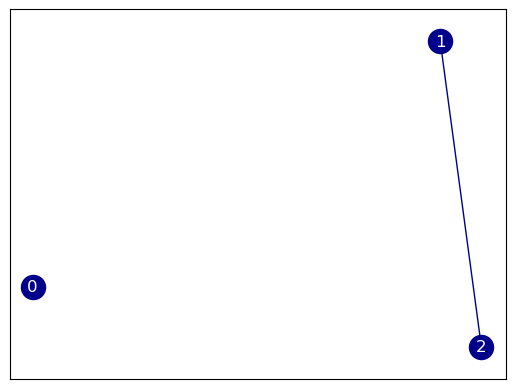

In [2]:
A = adjacency_matrix(Theta)

G = nx.from_numpy_array(A)
pos = nx.drawing.layout.spring_layout(G, seed = 1234)

plt.figure()
nx.draw_networkx(G, pos = pos, node_color = "darkblue", edge_color = "darkblue", font_color = 'white', with_labels = True)

## Basic usage of ``glasso_problem``.
We now create an instance of ``glasso_problem``. The problem formulation is derived automatically from the input shape of ``S``.




In [3]:
P = glasso_problem(S, N, reg_params = {'lambda1': 0.05}, latent = False, do_scaling = False)
print(P)

 
SINGLE GRAPHICAL LASSO PROBLEM 
Regularization parameters:
{'lambda1': 0.05, 'mu1': None}


Next, do model selection by solving the problem on a range of $\lambda_1$ values.




In [4]:
lambda1_range = np.logspace(0, -3, 30)
modelselect_params = {'lambda1_range': lambda1_range}

P.model_selection(modelselect_params = modelselect_params, method = 'eBIC', gamma = 0.5)

# regularization parameters are set to the best ones found during model selection
print(P.reg_params)

ADMM terminated after 11 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 8 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 8 iterations with status: optimal.
ADMM terminated after 8 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 9 iterations with status: optimal.
ADMM terminated after 29 iterations with status: optimal.
ADMM terminated after 28 iterations with status: optimal.
ADMM terminated after 25 ite

## Plotting the recovered graph and matrix
The solution (i.e. estimated precision matrix) is stored in the ``P.solution`` object. We calculate an adjacency matrix thresholding all entries smaller than ``1e-4`` in absolute value (optional) and draw the corresponding graph.




Text(0.5, 1.0, 'Recovered precision matrix')

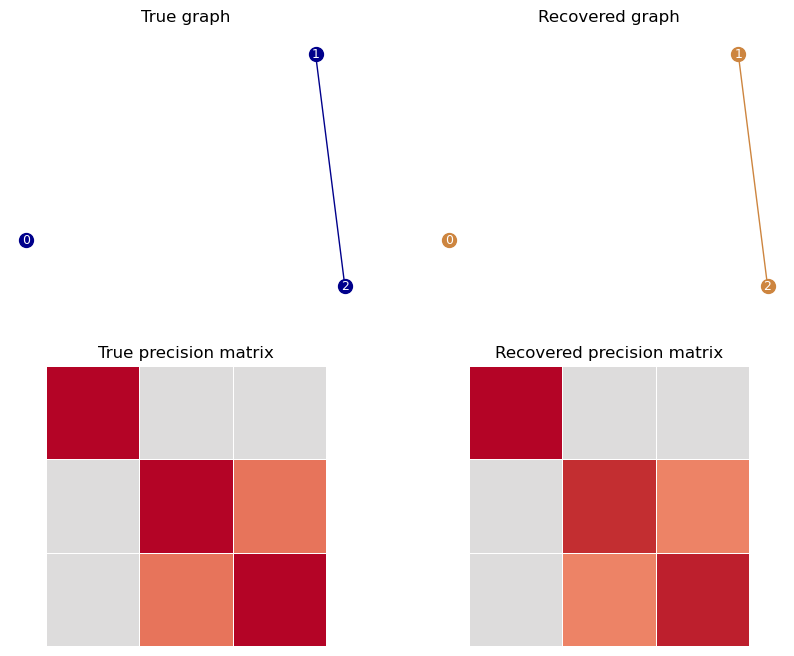

In [5]:
#tmp = P.modelselect_stats
sol = P.solution.precision_
P.solution.calc_adjacency(t = 1e-4)


fig, axs = plt.subplots(2,2, figsize=(10,8))
node_size = 100
font_size = 9

nx.draw_networkx(G, pos = pos, node_size = node_size, node_color = "darkblue", edge_color = "darkblue", \
                 font_size = font_size, font_color = 'white', with_labels = True, ax = axs[0,0])
axs[0,0].axis('off')
axs[0,0].set_title("True graph")


G1 = nx.from_numpy_array(P.solution.adjacency_)
nx.draw_networkx(G1, pos = pos, node_size = node_size, node_color = "peru", edge_color = "peru", \
               font_size = font_size, font_color = 'white', with_labels = True, ax = axs[0,1])
axs[0,1].axis('off')
axs[0,1].set_title("Recovered graph")

sns.heatmap(Theta, cmap = "coolwarm", vmin = -1.0, vmax = 1.0, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1,0])
axs[1,0].set_title("True precision matrix")
    
sns.heatmap(sol, cmap = "coolwarm", vmin = -1.0, vmax = 1.0, linewidth = .5, square = True, cbar = False, \
            xticklabels = [], yticklabels = [], ax = axs[1,1])
axs[1,1].set_title("Recovered precision matrix")